Connected to Python 3.11.2

In [ ]:

import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from xgboost import plot_importance, plot_tree
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.model_selection import TimeSeriesSplit



In [ ]:
data = pd.read_csv(r"C:\Users\Kshit\Desktop\Data analysis\uber project\UberDataset.csv")

In [ ]:
data.columns

Index(['START_DATE', 'END_DATE', 'CATEGORY', 'START', 'STOP', 'MILES',
       'PURPOSE'],
      dtype='object')

In [ ]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB
None


In [ ]:
data.head

<bound method NDFrame.head of             START_DATE          END_DATE  CATEGORY             START  \
0     01-01-2016 21:11  01-01-2016 21:17  Business       Fort Pierce   
1     01-02-2016 01:25  01-02-2016 01:37  Business       Fort Pierce   
2     01-02-2016 20:25  01-02-2016 20:38  Business       Fort Pierce   
3     01-05-2016 17:31  01-05-2016 17:45  Business       Fort Pierce   
4     01-06-2016 14:42  01-06-2016 15:49  Business       Fort Pierce   
...                ...               ...       ...               ...   
1151  12/31/2016 13:24  12/31/2016 13:42  Business           Kar?chi   
1152  12/31/2016 15:03  12/31/2016 15:38  Business  Unknown Location   
1153  12/31/2016 21:32  12/31/2016 21:50  Business        Katunayake   
1154  12/31/2016 22:08  12/31/2016 23:51  Business           Gampaha   
1155            Totals               NaN       NaN               NaN   

                  STOP    MILES          PURPOSE  
0          Fort Pierce      5.1   Meal/Entertain  
1  

In [ ]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'])
data['END_DATE'] = pd.to_datetime(data['END_DATE'])


Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "pandas\_libs\tslib.pyx", line 605, in pandas._libs.tslib.array_to_datetime
  File "pandas\_libs\tslibs\parsing.pyx", line 318, in pandas._libs.tslibs.parsing.parse_datetime_string
  File "C:\Users\Kshit\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py", line 1368, in parse
    return DEFAULTPARSER.parse(timestr, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Kshit\AppData\Roaming\Python\Python311\site-packages\dateutil\parser\_parser.py", line 643, in parse
    raise ParserError("Unknown string format: %s", timestr)
dateutil.parser._parser.ParserError: Unknown string format: Totals

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "pandas\_libs\tslib.pyx", line 616, in pandas._libs.tslib.array_to_datetime
TypeError: invalid string coercion to datetime for "Totals" at position 1155

During handling of the above exception, another

In [ ]:
data['START_DATE'] = pd.to_datetime(data['START_DATE'], errors='coerce')
data['END_DATE'] = pd.to_datetime(data['END_DATE'], errors='coerce')


In [ ]:
data.tail

<bound method NDFrame.tail of               START_DATE            END_DATE  CATEGORY             START  \
0    2016-01-01 21:11:00 2016-01-01 21:17:00  Business       Fort Pierce   
1    2016-01-02 01:25:00 2016-01-02 01:37:00  Business       Fort Pierce   
2    2016-01-02 20:25:00 2016-01-02 20:38:00  Business       Fort Pierce   
3    2016-01-05 17:31:00 2016-01-05 17:45:00  Business       Fort Pierce   
4    2016-01-06 14:42:00 2016-01-06 15:49:00  Business       Fort Pierce   
...                  ...                 ...       ...               ...   
1151 2016-12-31 13:24:00 2016-12-31 13:42:00  Business           Kar?chi   
1152 2016-12-31 15:03:00 2016-12-31 15:38:00  Business  Unknown Location   
1153 2016-12-31 21:32:00 2016-12-31 21:50:00  Business        Katunayake   
1154 2016-12-31 22:08:00 2016-12-31 23:51:00  Business           Gampaha   
1155                 NaT                 NaT       NaN               NaN   

                  STOP    MILES          PURPOSE  
0     

In [ ]:
# Extracting useful information from Date/Time
data['Hour'] = data['START_DATE'].dt.hour
data['Day'] = data['START_DATE'].dt.day
data['DayOfWeek'] = data['START_DATE'].dt.dayofweek
data['Month'] = data['START_DATE'].dt.month


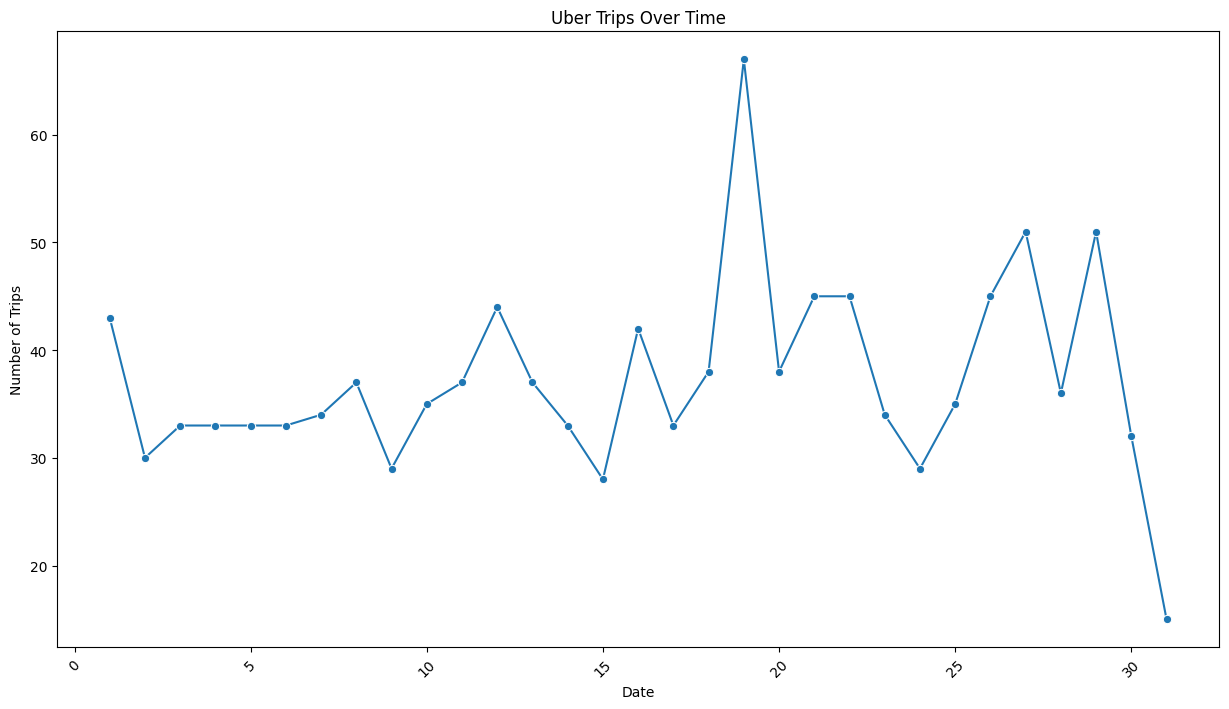

In [ ]:
# %%
# %%
# Plot trip frequency over time
plt.figure(figsize=(15, 8))
sns.lineplot(x=data["Day"].value_counts().sort_index().index,
             y=data["Day"].value_counts().sort_index().values, marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()

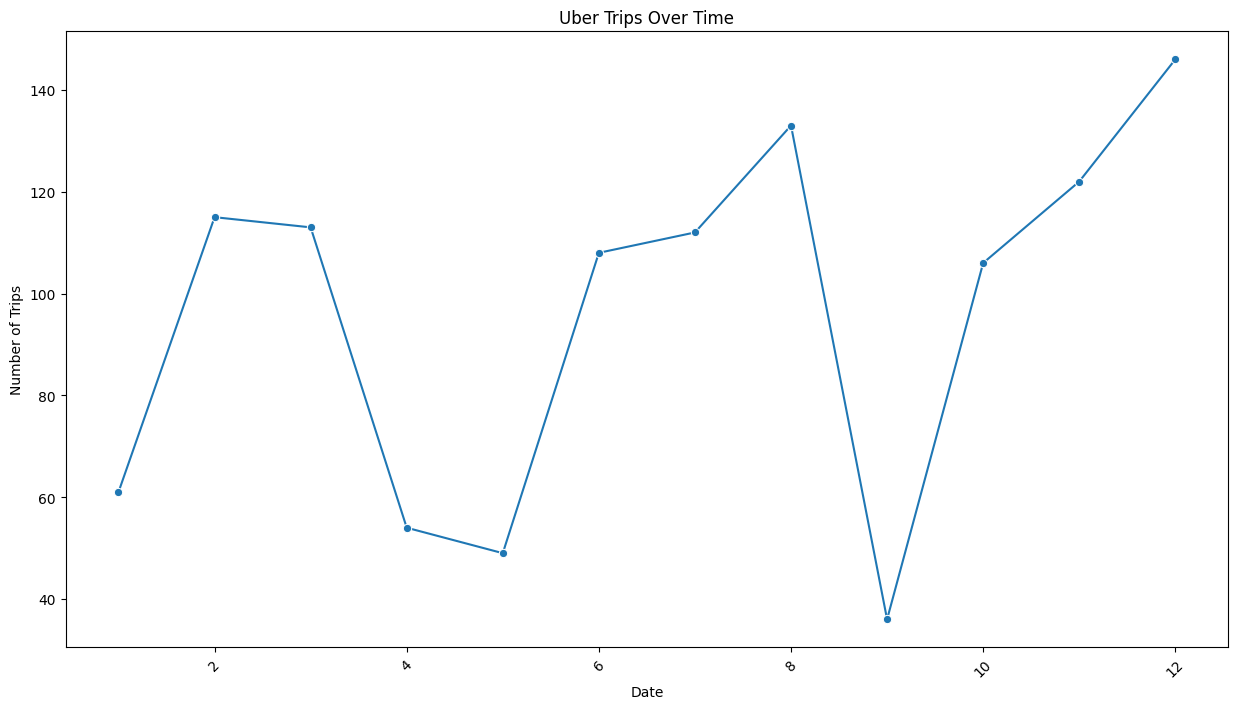

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=data["Month"].value_counts().sort_index().index,
             y=data["Month"].value_counts().sort_index().values, marker="o")
plt.xlabel("Date")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#Count of trips by purpose

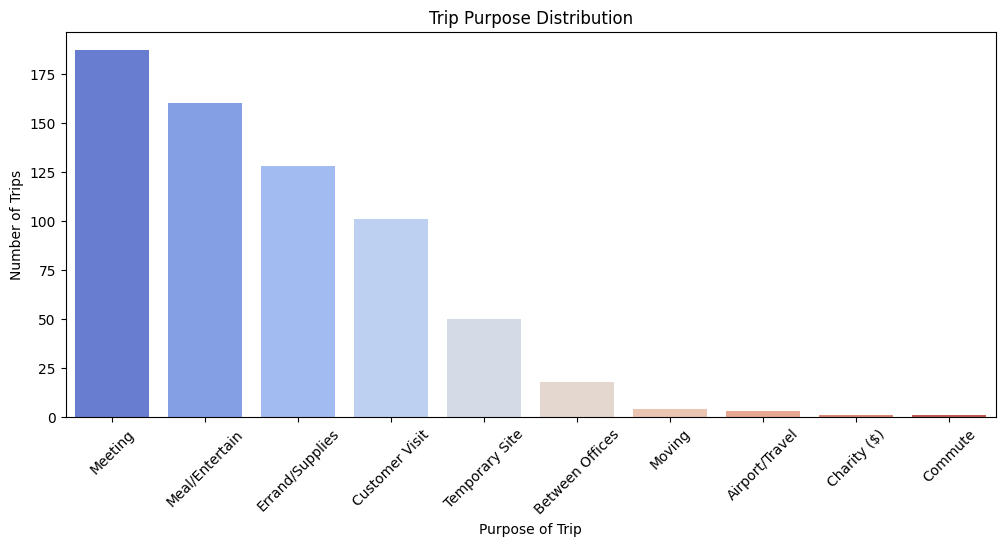

In [ ]:
trip_purpose_counts = data["PURPOSE"].value_counts()
plt.figure(figsize=(12, 5))
sns.barplot(x=trip_purpose_counts.index, y=trip_purpose_counts.values, palette="coolwarm")
plt.xlabel("Purpose of Trip")
plt.ylabel("Number of Trips")
plt.title("Trip Purpose Distribution")
plt.xticks(rotation=45)
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


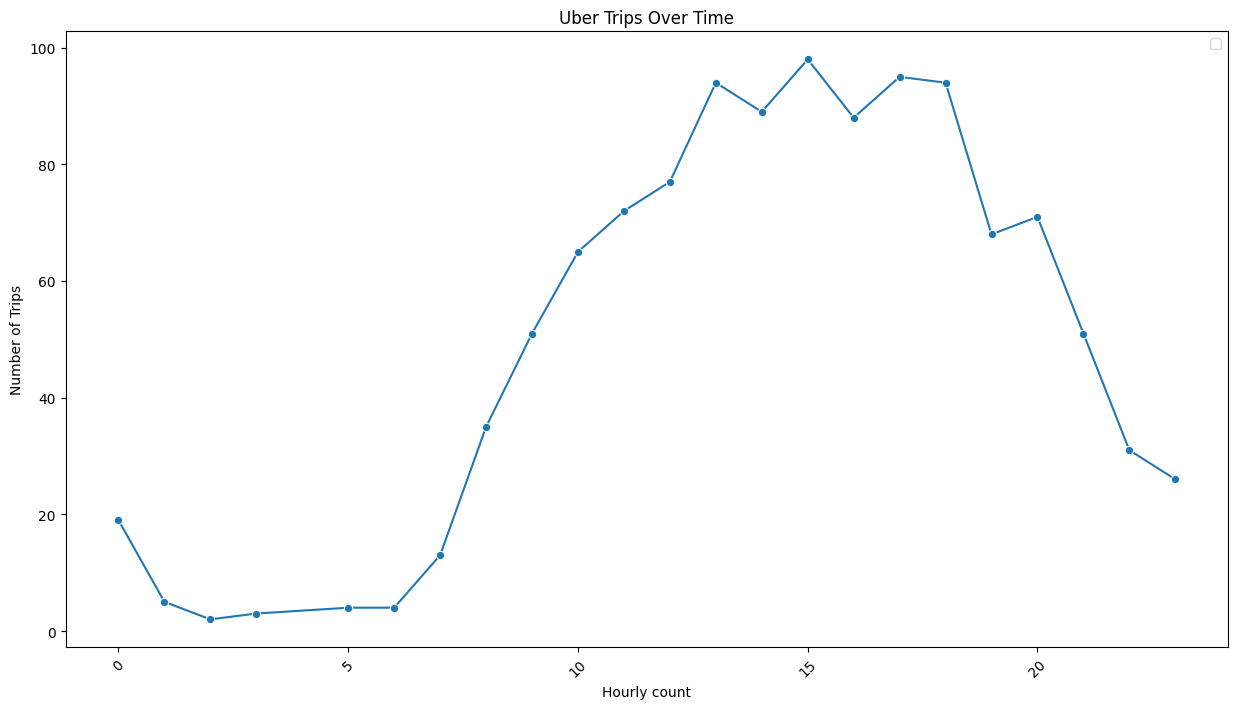

In [ ]:
plt.figure(figsize=(15, 8))
sns.lineplot(x=data["Hour"].value_counts().sort_index().index,
             y=data["Hour"].value_counts().sort_index().values, marker="o")
plt.xlabel("Hourly count")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")
plt.xticks(rotation=45)
plt.legend()
plt.show()

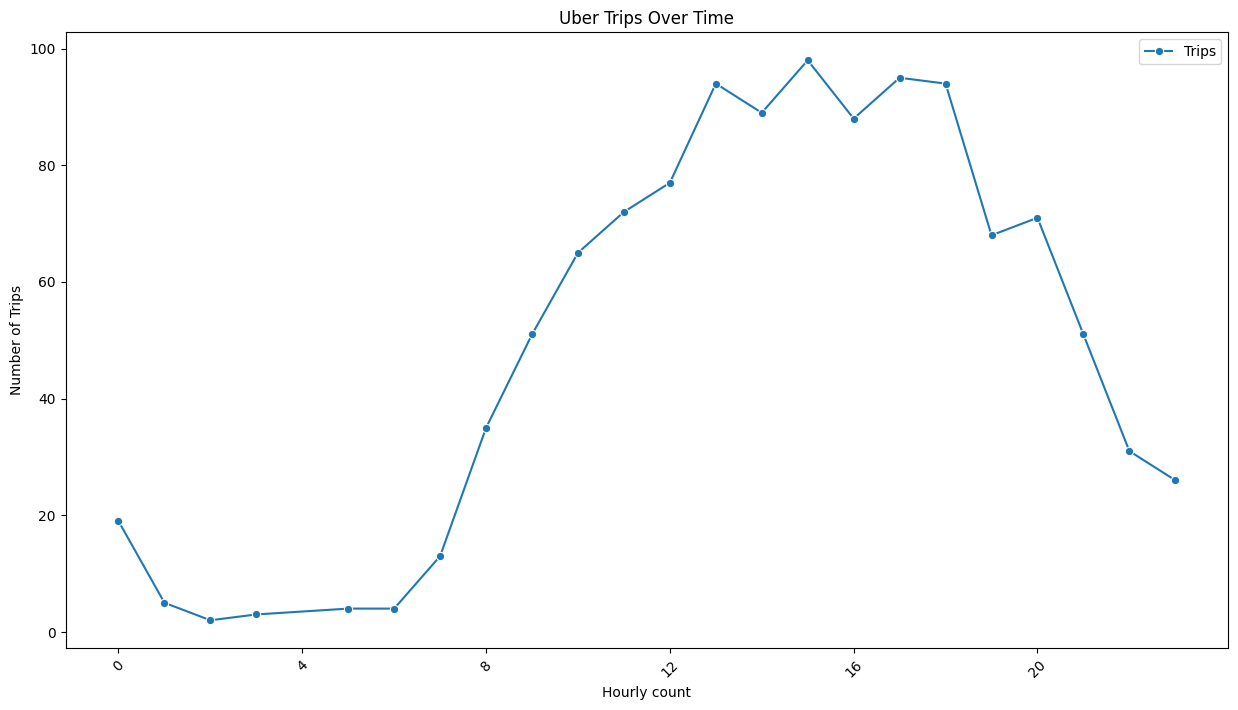

In [ ]:
plt.figure(figsize=(15, 8))

# Sorting hourly count
hourly_counts = data["Hour"].value_counts().sort_index()

# Plot the line chart
sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")

# Set labels and title
plt.xlabel("Hourly count")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")

# Set x-axis ticks at intervals of 4 hours
plt.xticks(np.arange(min(hourly_counts.index), max(hourly_counts.index) + 1, 4))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend (optional)
plt.legend(["Trips"])

# Display the plot
plt.show()

In [ ]:
plt.figure(figsize=(15, 8))
Miles_travelled = data["MILES"].value_counts().sort_index()

sns.lineplot(x=Miles_travelled, y=Month.values, marker="o")

# Set labels and title
plt.xlabel("Hourly count")
plt.ylabel("Number of Trips")
plt.title("Uber Trips Over Time")

# Set x-axis ticks at intervals of 4 hours
plt.xticks(np.arange(min(hourly_counts.index), max(hourly_counts.index) + 1, 4))

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45)

# Show the legend (optional)
plt.legend(["Trips"])

# Display the plot
plt.show()

NameError: name 'Month' is not defined

<Figure size 1500x800 with 0 Axes>

No kernel connected